In [2]:
#Mounting Google Drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
#Importing required libraries
import pandas as pd;
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split
import numpy as np

In [4]:
#Setting the file path
file_path="/content/drive/My Drive/CSV/diabetes.csv"
dataset=pd.read_csv(file_path)

In [5]:
# Load the dataset here
dataset = pd.read_csv(file_path, header=None).values

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,0:8], dataset[:,8],
                                                    test_size=0.25, random_state=87)
np.random.seed(155)
#Creating the model
my_first_nn = Sequential()

#Adding Hidden Layer with relu activation function
my_first_nn.add(Dense(20, input_dim=8, activation='relu'))

#Adding the output layer with sigmoid activation function
my_first_nn.add(Dense(1, activation='sigmoid'))

#Compiling and fitting the model
my_first_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
my_first_nn.fit(X_train, Y_train, epochs=100,initial_epoch=0)

#Printing out the output
loss,accuracy= my_first_nn.evaluate(X_test, Y_test)
print("Loss:",loss)
print("Accuracy:",accuracy)

Epoch 1/100
18/18 [==============================] - 5s 3ms/step - loss: 20.5973 - acc: 0.3385
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 10.6136 - acc: 0.3385
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 5.9158 - acc: 0.4132
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 4.0659 - acc: 0.4618
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 3.1753 - acc: 0.4601
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: 2.8228 - acc: 0.4740
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 2.4376 - acc: 0.5069
Epoch 8/100
18/18 [==============================] - 0s 4ms/step - loss: 2.1931 - acc: 0.5104
Epoch 9/100
18/18 [==============================] - 0s 4ms/step - loss: 1.8598 - acc: 0.5469
Epoch 10/100
18/18 [==============================] - 0s 4ms/step - loss: 1.5465 - acc: 0.5972
Epoch 11/100
18/18 [==============================] - 0s 

In [17]:
# Split the data into training and testing datasets
X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,0:8], dataset[:,8], test_size=0.25, random_state=87)
np.random.seed(155)

# Creating the model
my_first_nn = Sequential()

# Adding anonther hidden layer with the relu activation function
my_first_nn.add(Dense(20, input_dim=8, activation='relu'))

# Adding another Hidden layer with the tanh activation function
my_first_nn.add(Dense(20, activation='tanh'))




#Adding another Hidden layer with the sigmoid activation function
my_first_nn.add(Dense(20, activation='sigmoid'))

# Output Layer with sigmoid activation function
my_first_nn.add(Dense(1, activation='sigmoid'))

#Compiling and fitting the model
my_first_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
my_first_nn.fit(X_train, Y_train, epochs=100, initial_epoch=0)

loss,accuracy = my_first_nn.evaluate(X_test, Y_test)
#Printing out the output
print("Loss:",loss)
print("Accuracy:",accuracy)


Epoch 1/100
18/18 [==============================] - 2s 3ms/step - loss: 0.6423 - acc: 0.6615
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6352 - acc: 0.6615
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6316 - acc: 0.6615
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6286 - acc: 0.6615
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6263 - acc: 0.6615
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6234 - acc: 0.6615
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6180 - acc: 0.6615
Epoch 8/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6135 - acc: 0.6615
Epoch 9/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6172 - acc: 0.6615
Epoch 10/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6092 - acc: 0.6615
Epoch 11/100
18/18 [==============================] - 0s 4m

2

In [21]:
from keras.datasets import mnist

from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
#process the data
#Converting each image of shape (28*28) to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
#Adding the hidden layer with relu activation function
model.add(Dense(512, activation='relu', input_shape=(dimData,)))

#Adding another hidden layer with tanh activation function
model.add(Dense(512, activation='tanh'))

#Adding another hidden layer again with tanh activation function
model.add(Dense(512, activation='tanh'))

model.add(Dense(10, activation='softmax'))

#Compiling and fitting the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,validation_data=(test_data, test_labels_one_hot))


(28, 28)
784
Epoch 1/10
235/235 [==============================] - 3s 7ms/step - loss: 0.2815 - accuracy: 0.9123 - val_loss: 0.1603 - val_accuracy: 0.9513
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0957 - accuracy: 0.9705 - val_loss: 0.1163 - val_accuracy: 0.9649
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0617 - accuracy: 0.9806 - val_loss: 0.1171 - val_accuracy: 0.9656
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0433 - accuracy: 0.9860 - val_loss: 0.1008 - val_accuracy: 0.9712
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0318 - accuracy: 0.9895 - val_loss: 0.0823 - val_accuracy: 0.9747
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0249 - accuracy: 0.9921 - val_loss: 0.0733 - val_accuracy: 0.9798
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0202 - accuracy: 0.9933 - val_loss: 0.0769 - val_accuracy: 

In [24]:
from keras.datasets import mnist

from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
#process the data
#Converting each image of shape (28*28) to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')

#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
#Adding the hidden layer with relu activation function
model.add(Dense(512, activation='relu', input_shape=(dimData,)))

#Adding another hidden layer with tanh activation function
model.add(Dense(512, activation='tanh'))

#Adding another hidden layer again with tanh activation function
model.add(Dense(512, activation='tanh'))

model.add(Dense(10, activation='softmax'))

#Compiling and fitting the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,validation_data=(test_data, test_labels_one_hot))


(28, 28)
784
Epoch 1/10
235/235 [==============================] - 2s 6ms/step - loss: 0.5874 - accuracy: 0.8263 - val_loss: 0.2748 - val_accuracy: 0.9160
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.2698 - accuracy: 0.9155 - val_loss: 0.2565 - val_accuracy: 0.9184
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 0.2202 - accuracy: 0.9318 - val_loss: 0.2075 - val_accuracy: 0.9387
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1948 - accuracy: 0.9398 - val_loss: 0.2490 - val_accuracy: 0.9194
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1832 - accuracy: 0.9428 - val_loss: 0.2820 - val_accuracy: 0.9090
Epoch 6/10
235/235 [==============================] - 2s 6ms/step - loss: 0.1708 - accuracy: 0.9468 - val_loss: 0.2023 - val_accuracy: 0.9411
Epoch 7/10
235/235 [==============================] - 1s 6ms/step - loss: 0.1624 - accuracy: 0.9497 - val_loss: 0.1813 - val_accuracy: 

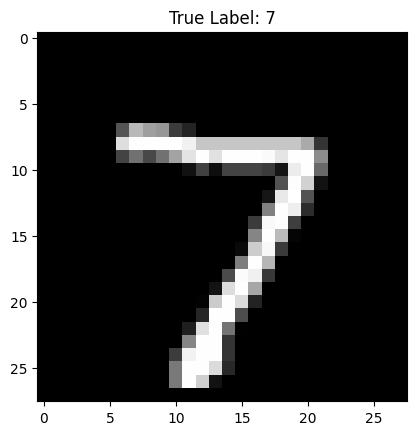

1/1 [==============================] - 0s 230ms/step
Predicted Label: 7


In [25]:
import matplotlib.pyplot as plt

# Choose an image from the test data (e.g., the first image, index 0)
image_to_predict = test_data[0]
true_label = test_labels[0]

# Reshape the image to its original 28x28 shape (for visualization)
original_image = test_images[0]

# Plot the original image
plt.imshow(original_image, cmap='gray')
plt.title(f'True Label: {true_label}')
plt.show()

# Make a prediction on the chosen image
prediction = model.predict(np.expand_dims(image_to_predict, axis=0))
predicted_label = np.argmax(prediction)

# Print the prediction
print(f'Predicted Label: {predicted_label}')
